In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("Breast Cancer Dataset.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.shape

(569, 33)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Drop unnecessary columns 'id' and 'Unnamed: 32' from the dataset
dataset = dataset.drop(["id", "Unnamed: 32"], axis=1)

In [6]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Encode the categorical 'diagnosis' column into numeric values (M=1, B=0)
lb = LabelEncoder()
dataset['diagnosis'] = lb.fit_transform(dataset['diagnosis'])

In [8]:
dataset['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

# Data Visulization 

In [9]:
# sns.pairplot(dataset, hue="diagnosis")
# plt.show()

In [10]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

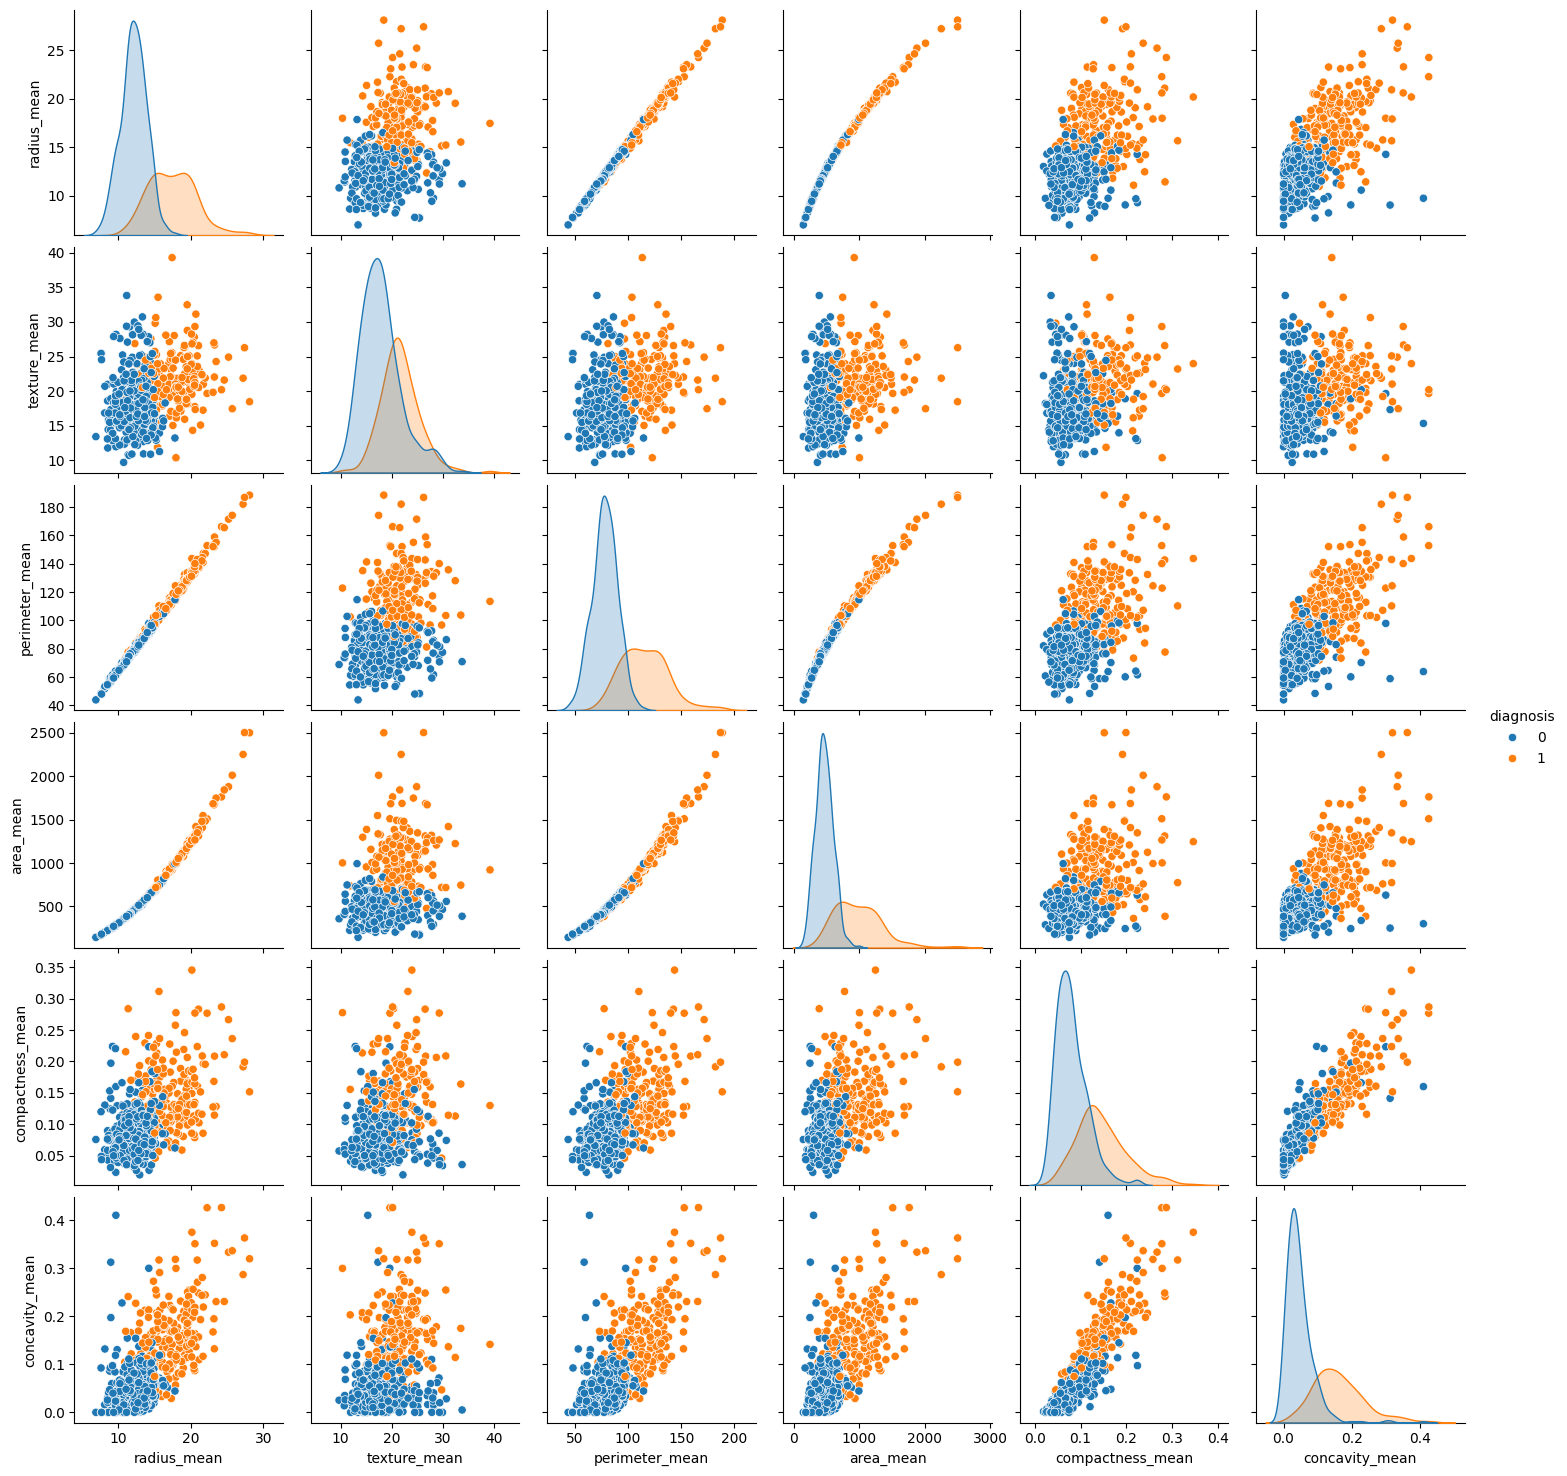

In [11]:
# Select key features along with the target column 'diagnosis'
selected_cols = ["radius_mean", "texture_mean", "perimeter_mean",
                 "area_mean", "compactness_mean", "concavity_mean", "diagnosis"]

# Create pair plots to visualize relationships between selected features,
# colored by 'diagnosis' (Malignant/Benign)
sns.pairplot(dataset[selected_cols], hue="diagnosis", diag_kind="kde")
plt.show()


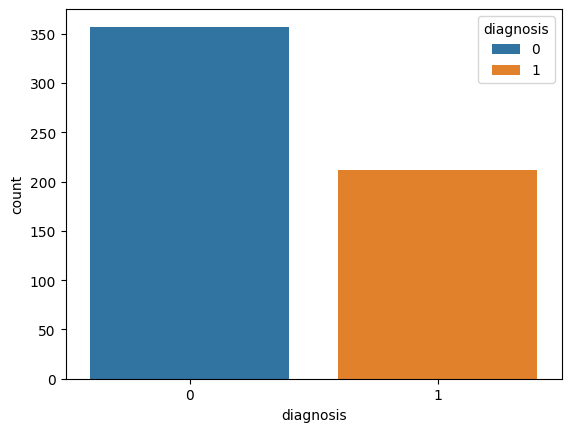

In [12]:
# Plot the count of each diagnosis category (Malignant vs Benign)
sns.countplot(x="diagnosis", hue="diagnosis", data=dataset)
plt.show()

In [13]:
# Calculate the correlation matrix to measure relationships between all numeric features
corr = dataset.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


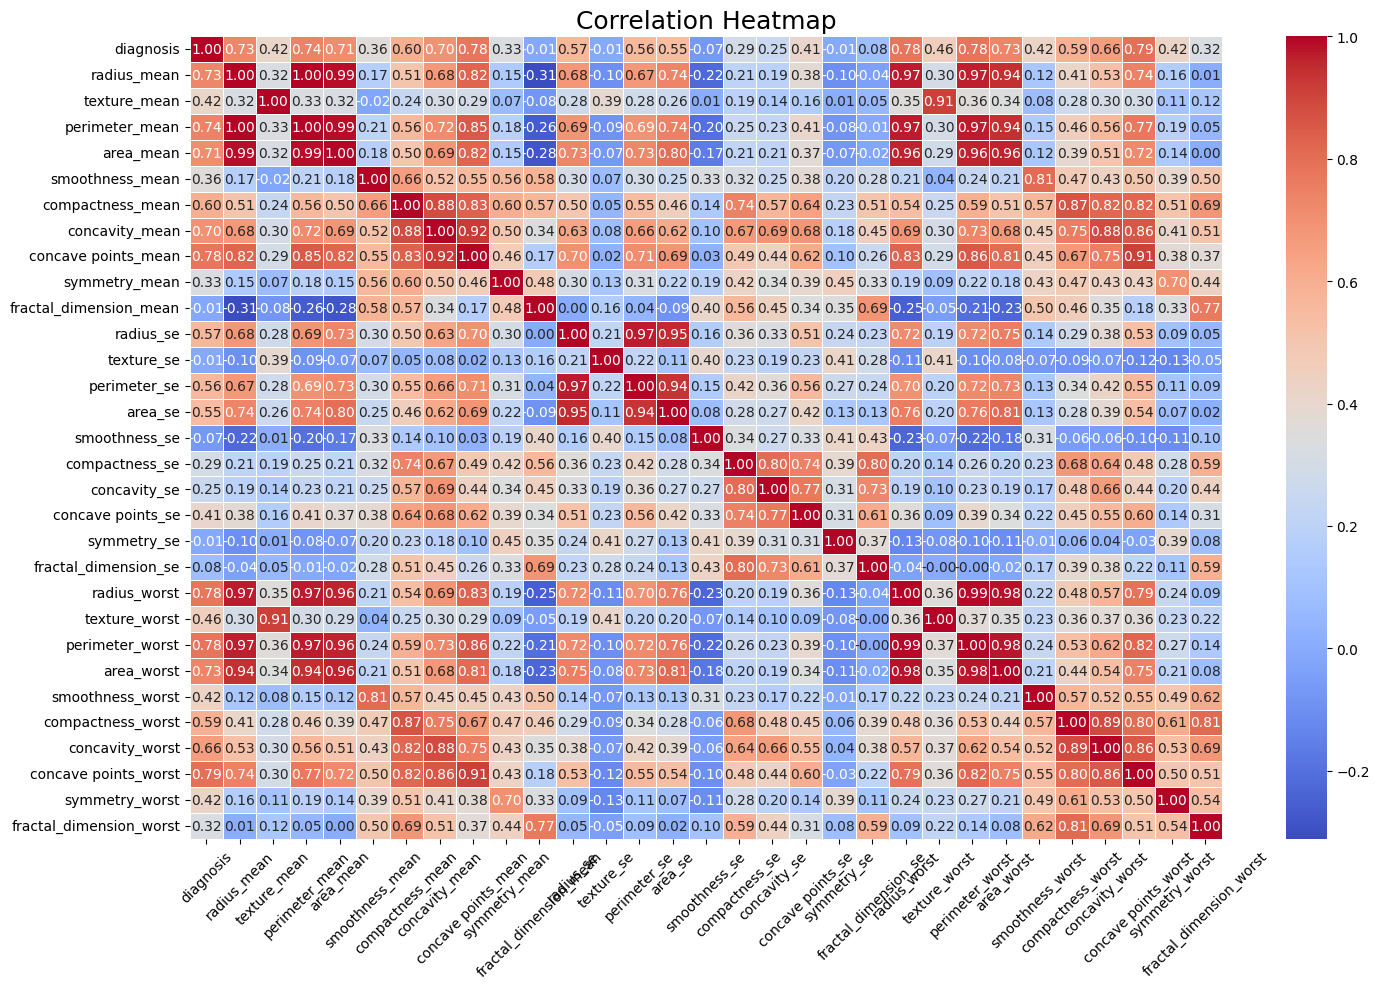

In [14]:
# Compute correlation matrix and visualize it using a heatmap
corr = dataset.corr()

plt.figure(figsize=(15,10))  # Set figure size for better readability

# Draw heatmap with annotations for correlation values
sns.heatmap(
    corr,
    cmap="coolwarm",      # Color scheme for correlations
    annot=True,           # Display correlation values inside cells
    fmt=".2f",            # Show values with 2 decimal places
    linewidths=0.5,       # Thin lines between cells
    cbar=True             # Show color bar legend
)

# Add title and adjust axis labels
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, fontsize=10)  
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [15]:
# Get correlations of all features with the target column 'diagnosis',
# sorted in descending order to identify the most influential features
diagnosis_corr = corr['diagnosis'].sort_values(ascending=False)
print(diagnosis_corr)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

C:\Users\Aamir Shahzad\AppData\Local\Temp\ipykernel_9992\2637744695.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_corr.values, y=diagnosis_corr.index, palette="coolwarm")


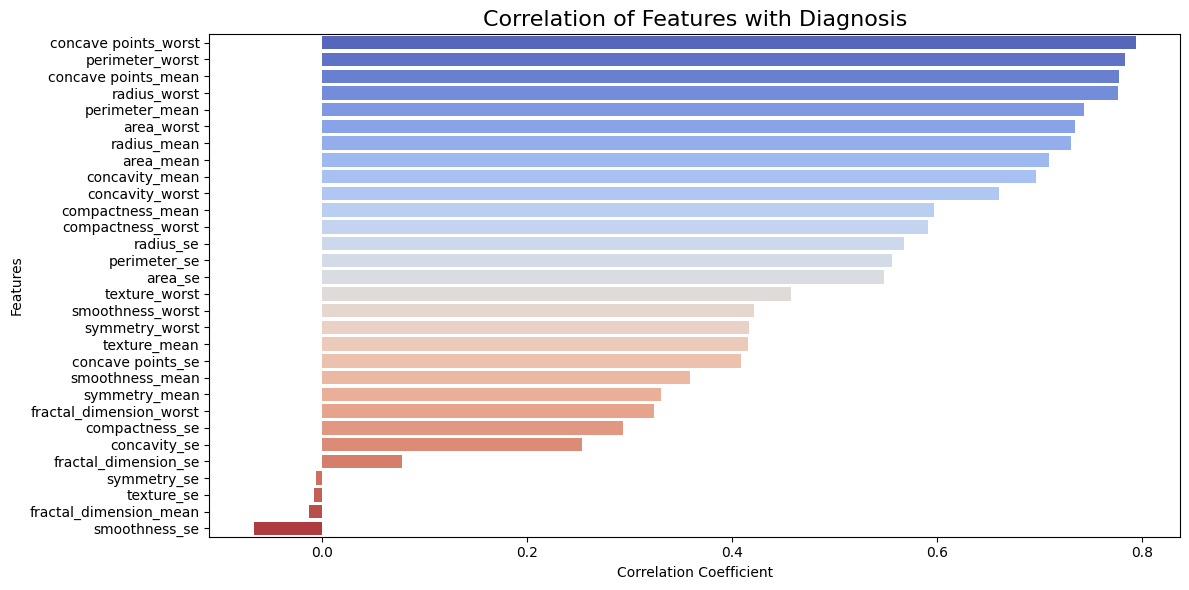

In [16]:
# Remove 'diagnosis' self-correlation and sort remaining features by correlation strength
diagnosis_corr = corr['diagnosis'].drop('diagnosis') 
diagnosis_corr = diagnosis_corr.sort_values(ascending=False)

plt.figure(figsize=(12,6))  # Set figure size

# Create bar plot of feature correlations with target variable 'diagnosis'
sns.barplot(x=diagnosis_corr.values, y=diagnosis_corr.index, palette="coolwarm")

# Add title and axis labels
plt.title("Correlation of Features with Diagnosis", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# Feature Scaling

In [17]:
# Split dataset into features (X) and target variable (y)
x = dataset.drop(["diagnosis"], axis=1)  # All predictor variables
y = dataset['diagnosis']                 # Target column


In [18]:
# Standardize features by removing the mean and scaling to unit variance
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)

# Train-Test Split

In [19]:
# Split dataset into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [20]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [21]:
y_train.shape, y_test.shape

((455,), (114,))

# Model Selection

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, classification_report, confusion_matrix

In [23]:
# ----------------------------------------
# Define multiple classification models
# ----------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Linear SVM": SVC(kernel="linear", probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# ----------------------------------------
# Train, Predict, and Evaluate Each Model
# ----------------------------------------
for name, model in models.items():
    print(f"\n🔹 {name} Results")
    print("=" * 60)

    # Train the model on training data
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate performance using multiple metrics
    acc = accuracy_score(y_test, y_pred)          # Accuracy
    precision = precision_score(y_test, y_pred)   # Precision
    recall = recall_score(y_test, y_pred)         # Recall
    f1 = f1_score(y_test, y_pred)                 # F1 Score

    # Generate confusion matrix and detailed classification report
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print evaluation results
    print(f"=> Accuracy Score: {acc:.4f}")
    print(f"=> Precision Score: {precision:.4f}")
    print(f"=> Recall Score: {recall:.4f}")
    print(f"=> F1 Score: {f1:.4f}")
    print("\n ===> Classification Report:\n", report)
    print(" ___Confusion Matrix___:\n", cm)
    print("-" * 60)



🔹 Logistic Regression Results
=> Accuracy Score: 0.9737
=> Precision Score: 0.9762
=> Recall Score: 0.9535
=> F1 Score: 0.9647

 ===> Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

 ___Confusion Matrix___:
 [[70  1]
 [ 2 41]]
------------------------------------------------------------

🔹 Linear SVM Results
=> Accuracy Score: 0.9561
=> Precision Score: 0.9318
=> Recall Score: 0.9535
=> F1 Score: 0.9425

 ===> Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0

D:\Anaconda\envs\ml_env\lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=> Accuracy Score: 0.9561
=> Precision Score: 0.9524
=> Recall Score: 0.9302
=> F1 Score: 0.9412

 ===> Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

 ___Confusion Matrix___:
 [[69  2]
 [ 3 40]]
------------------------------------------------------------


C:\Users\Aamir Shahzad\AppData\Local\Temp\ipykernel_9992\1563609716.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=results_df, x="Model", y="Accuracy", palette="coolwarm")


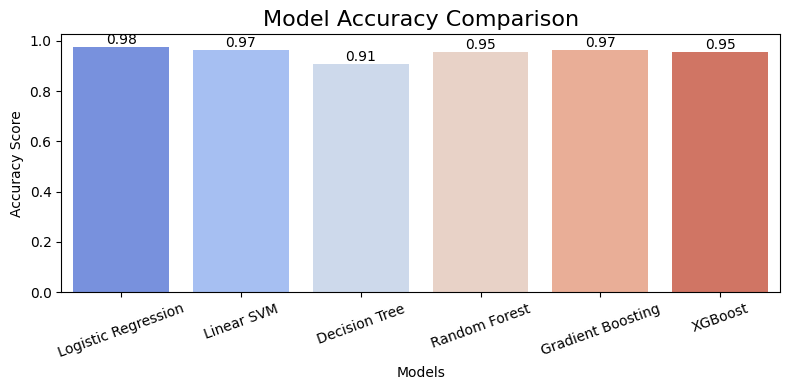

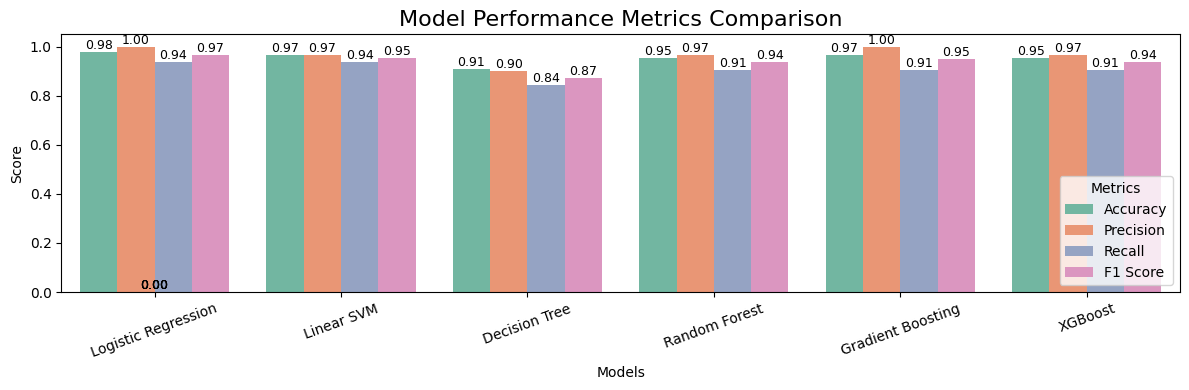

In [24]:
# ---------------------------------------
# Create DataFrame of model performance metrics
# ---------------------------------------
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Linear SVM", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"],
    "Accuracy": [0.9767, 0.9651, 0.9070, 0.9535, 0.9651, 0.9535],
    "Precision": [1.0000, 0.9677, 0.9000, 0.9667, 1.0000, 0.9667],
    "Recall": [0.9375, 0.9375, 0.8438, 0.9062, 0.9062, 0.9062],
    "F1 Score": [0.9677, 0.9524, 0.8710, 0.9355, 0.9508, 0.9355]
})

# ---------------------------------------
# Accuracy Comparison Bar Chart 
# ---------------------------------------
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=results_df, x="Model", y="Accuracy", palette="coolwarm")

# Add accuracy values above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# ---------------------------------------
# Multi-Metric Comparison (Accuracy, Precision, Recall, F1 Score)
# ---------------------------------------
metrics_df = results_df.melt(id_vars="Model",
                             value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
                             var_name="Metric",
                             value_name="Score")

plt.figure(figsize=(12, 4))
ax = sns.barplot(data=metrics_df, x="Model", y="Score", hue="Metric", palette="Set2")

# Add metric values above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

plt.title("Model Performance Metrics Comparison", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=20)
plt.legend(title="Metrics", loc='lower right')
plt.tight_layout()
plt.show()


In [25]:
dataset['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [26]:
# Hyperparameter Tuning: Logistic Regression (with Scaling + CV)

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline


# Pipeline: Standardize + LogisticRegression

pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, random_state=42))
])


# Param Grids (compatible combos only)

param_grid = [
    # liblinear: l1 or l2
    {
        "clf__solver": ["liblinear"],
        "clf__penalty": ["l1", "l2"],
        "clf__C": [0.01, 0.1, 1, 3, 10],
        "clf__class_weight": [None, "balanced"]
    },
    # lbfgs / newton-cg / sag: only l2
    {
        "clf__solver": ["lbfgs", "newton-cg", "sag"],
        "clf__penalty": ["l2"],
        "clf__C": [0.01, 0.1, 1, 3, 10],
        "clf__class_weight": [None, "balanced"]
    },
    # saga: l1, l2, elasticnet
    {
        "clf__solver": ["saga"],
        "clf__penalty": ["l1", "l2", "elasticnet"],
        "clf__l1_ratio": [None, 0.2, 0.5, 0.8],  # used only if elasticnet
        "clf__C": [0.01, 0.1, 1, 3, 10],
        "clf__class_weight": [None, "balanced"]
    },
]

# CV + Multi-metric scoring (refit on F1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"accuracy": "accuracy", "f1": "f1", "roc_auc": "roc_auc"}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1",              # Best by F1 (imbalanced data ke liye balanced choice)
    cv=cv,
    n_jobs=-1,
    verbose=0
)

grid.fit(x_train, y_train)

print("Best Params (by F1):", grid.best_params_)
print("CV Best F1:", f"{grid.best_score_:.4f}")

# Final Eval on Test Set

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

# probability for AUC
if hasattr(best_model.named_steps["clf"], "predict_proba"):
    y_proba = best_model.predict_proba(x_test)[:, 1]
else:
    # fallback for decision_function
    y_proba = best_model.decision_function(x_test)
    # scale to 0-1 if needed (optional)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)
cm   = confusion_matrix(y_test, y_pred)

print("\n=== Test Set Performance (Tuned Logistic Regression) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")
print("\nClassification Report ==>:\n", classification_report(y_test, y_pred))
print("Confusion Matrix ==>:\n", cm)


D:\Anaconda\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 850.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\ml_env\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\Anaconda\envs\ml_env\lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "D:\Anacond

Best Params (by F1): {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__l1_ratio': 0.2, 'clf__penalty': 'elasticnet', 'clf__solver': 'saga'}
CV Best F1: 0.9701

=== Test Set Performance (Tuned Logistic Regression) ===
Accuracy : 0.9825
Precision: 0.9767
Recall   : 0.9767
F1-Score : 0.9767
ROC-AUC  : 0.9980

Classification Report ==>:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix ==>:
 [[70  1]
 [ 1 42]]


In [27]:
# ==========================================================
#  Create Pipeline with Scaling + Logistic Regression
# ==========================================================
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Feature Scaling
    ('clf', LogisticRegression(
        C=0.1,                     
        class_weight="balanced",   
        penalty="l2",              
        solver="liblinear",        
        max_iter=2000,             
        random_state=42
    ))
])

# ==========================================================
# 📌 Train Model
# ==========================================================
pipeline.fit(x_train, y_train)

# ==========================================================
# 📌 Predictions
# ==========================================================
y_pred = pipeline.predict(x_test)
y_prob = pipeline.predict_proba(x_test)[:, 1]  # For ROC-AUC

# ==========================================================
# 📌 Model Evaluation
# ==========================================================
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_prob)

print("=== Tuned Logistic Regression Performance ===")
print(f"Accuracy   : {accuracy:.4f}")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")
print(f"F1-Score   : {f1:.4f}")
print(f"ROC-AUC    : {roc_auc:.4f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix (only numbers, no graph)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


=== Tuned Logistic Regression Performance ===
Accuracy   : 0.9737
Precision  : 0.9545
Recall     : 0.9767
F1-Score   : 0.9655
ROC-AUC    : 0.9980
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[69  2]
 [ 1 42]]
